<img style="float: left; margin: 30px 15px 15px 15px;" src="https://pngimage.net/wp-content/uploads/2018/06/logo-iteso-png-5.png" width="300" height="500" /> 
    
    
### <font color='navy'> Simulación de procesos financieros. 

**Nombres:** Flavio Palacios 

**Fecha:** 28 de Abril del 2021.

**Expediente** : if729825, 
**Profesor:** Oscar David Jaramillo Zuluaga.

# Tarea 9: Clase 22

## Link de github
[Github](https://github.com/Palacios-F/ProyectoConjunto_FCPalacios)

### Instrucciones
Replicar el procedimiento anterior para valoración de opciones 'call', pero en este caso para opciones tipo 'put'.

In [1]:
#importar los paquetes que se van a usar
import pandas as pd
import pandas_datareader.data as web
import numpy as np
import datetime
import matplotlib.pyplot as plt
import scipy.stats as st
%matplotlib inline
from datetime import date
#algunas opciones para Pandas
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 6)
pd.set_option('display.max_rows', 10)
pd.set_option('display.width', 78)
pd.set_option('precision', 3)

In [2]:
aapl = web.YahooOptions('AAPL')
aapl_opt = aapl.get_all_data().reset_index()
aapl_opt.set_index('Expiry')

,Strike,Type,Symbol,...,Quote_Time,Last_Trade_Date,JSON
Expiry,,,,,,,
2021-06-18,18.75,call,AAPL210618C00018750,...,2021-04-27 23:59:58,2021-04-26 18:30:03,"{'contractSymbol': 'AAPL210618C00018750', 'str..."
2021-06-18,18.75,put,AAPL210618P00018750,...,2021-04-27 23:59:58,2021-04-22 14:35:20,"{'contractSymbol': 'AAPL210618P00018750', 'str..."
2021-06-18,20.00,call,AAPL210618C00020000,...,2021-04-27 23:59:58,2021-04-14 15:36:52,"{'contractSymbol': 'AAPL210618C00020000', 'str..."
2021-06-18,20.00,put,AAPL210618P00020000,...,2021-04-27 23:59:58,2021-03-22 19:57:37,"{'contractSymbol': 'AAPL210618P00020000', 'str..."
2021-06-18,21.25,call,AAPL210618C00021250,...,2021-04-27 23:59:58,2021-02-04 18:50:12,"{'contractSymbol': 'AAPL210618C00021250', 'str..."
...,...,...,...,...,...,...,...
2021-09-17,1000.00,call,AAPL210917C01000000,...,2021-04-27 23:59:58,2020-08-28 19:58:31,"{'contractSymbol': 'AAPL210917C01000000', 'str..."
2022-01-21,1000.00,call,AAPL220121C01000000,...,2021-04-27 23:59:58,2020-08-28 19:59:43,"{'contractSymbol': 'AAPL220121C01000000', 'str..."
2022-06-17,1000.00,call,AAPL220617C01000000,...,2021-04-27 23:59:58,2020-08-28 19:48:09,"{'contractSymbol': 'AAPL220617C01000000', 'str..."


In [3]:
fecha1 = '2021-09-17'
put09_f1 = aapl_opt.loc[(aapl_opt.Expiry== fecha1) & (aapl_opt.Type=='put')]
put09_f1

,Strike,Expiry,Type,...,Quote_Time,Last_Trade_Date,JSON
22,27.50,2021-09-17,put,...,2021-04-27 23:59:58,2021-04-21 19:51:45,"{'contractSymbol': 'AAPL210917P00027500', 'str..."
28,28.75,2021-09-17,put,...,2021-04-27 23:59:58,2021-04-12 13:58:21,"{'contractSymbol': 'AAPL210917P00028750', 'str..."
40,30.00,2021-09-17,put,...,2021-04-27 23:59:58,2021-04-20 18:25:39,"{'contractSymbol': 'AAPL210917P00030000', 'str..."
50,31.25,2021-09-17,put,...,2021-04-27 23:59:58,2021-04-07 13:38:42,"{'contractSymbol': 'AAPL210917P00031250', 'str..."
58,32.50,2021-09-17,put,...,2021-04-27 23:59:58,2021-04-23 13:39:37,"{'contractSymbol': 'AAPL210917P00032500', 'str..."
...,...,...,...,...,...,...,...
2212,560.00,2021-09-17,put,...,2021-04-27 23:59:58,2020-08-28 19:40:53,"{'contractSymbol': 'AAPL210917P00560000', 'str..."
2222,580.00,2021-09-17,put,...,2021-04-27 23:59:58,2020-08-25 13:59:05,"{'contractSymbol': 'AAPL210917P00580000', 'str..."
2230,600.00,2021-09-17,put,...,2021-04-27 23:59:58,2020-08-25 17:44:08,"{'contractSymbol': 'AAPL210917P00600000', 'str..."
2247,640.00,2021-09-17,put,...,2021-04-27 23:59:58,2020-08-27 16:29:02,"{'contractSymbol': 'AAPL210917P00640000', 'str..."


### Underlying Price

In [4]:
put09_f1.Underlying_Price.iloc[0]

134.79

### Volatility Smile

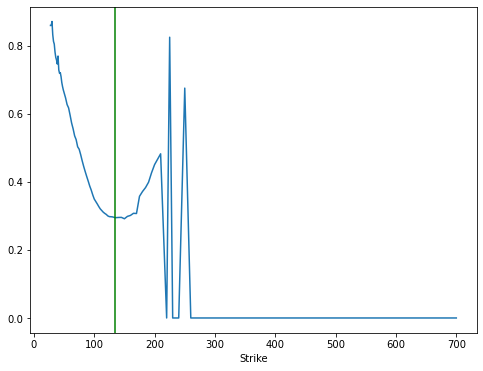

In [5]:
ax = put09_f1.set_index('Strike').loc[:, 'IV'].plot(figsize=(8,6))
ax.axvline(put09_f1.Underlying_Price.iloc[0], color='g');

In [6]:
def get_adj_closes(tickers, start_date=None, end_date=None):
    # Fecha inicio por defecto (start_date='2010-01-01') y fecha fin por defecto (end_date=today)
    # Descargamos DataFrame con todos los datos
    closes = web.DataReader(name=tickers, data_source='yahoo', start=start_date, end=end_date)
    # Solo necesitamos los precios ajustados en el cierre
    closes = closes['Adj Close']
    # Se ordenan los índices de manera ascendente
    closes.sort_index(inplace=True)
    return closes

def calc_daily_ret(closes):
    return np.log(closes/closes.shift(1)).iloc[1:]

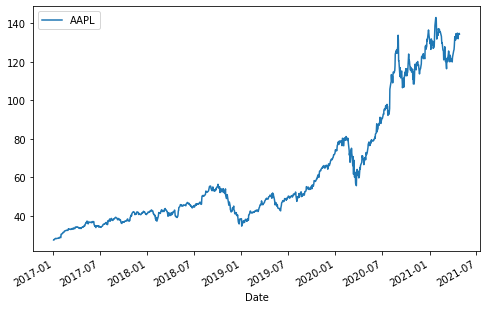

In [7]:
ticker = ['AAPL']
start_date = '2017-01-01'

closes_aapl = get_adj_closes(ticker, start_date)
closes_aapl.plot(figsize=(8,5));
plt.legend(ticker);

In [8]:
ret_aapl = calc_daily_ret(closes_aapl)

### Selección de la opción

In [9]:
K = 150 # strike price
indice_opt = aapl_opt.loc[(aapl_opt.Type=='put') & (aapl_opt.Strike==K) & (aapl_opt.Expiry==fecha1)]
indice_opt

,Strike,Expiry,Type,...,Quote_Time,Last_Trade_Date,JSON
1447,150.0,2021-09-17,put,...,2021-04-27 23:59:58,2021-04-26 15:31:33,"{'contractSymbol': 'AAPL210917P00150000', 'str..."


Escogí el strike de 150 porque en la sonrisa de volatilidad aproximadamente ese strike tenía una volatilidad equivalente al mismo strike que el día de hoy para la opción de put

In [10]:
i_opt= indice_opt.index
opcion_valuar = aapl_opt.loc[i_opt[0]]
opcion_valuar['JSON']

{'contractSymbol': 'AAPL210917P00150000',
 'strike': 150.0,
 'currency': 'USD',
 'lastPrice': 20.0,
 'change': 0.049999237,
 'percentChange': 0.25062272,
 'volume': 1,
 'openInterest': 1331,
 'bid': 19.8,
 'ask': 19.95,
 'contractSize': 'REGULAR',
 'expiration': 1631836800,
 'lastTradeDate': 1619451093,
 'impliedVolatility': 0.2915109912109374,
 'inTheMoney': True}

### Valuación Montecarlo

In [11]:
mu = ret_aapl.mean()[0]
sigma = ret_aapl.std()[0]
mu, sigma

(0.0014636109416715914, 0.01993063800754141)

In [12]:
# Tasa de bonos de 1 yr de fecha 27/04/21 -> 0.06%
r = 0.0006/360 # Tasa diaria

In [13]:


# Encontrar la fecha de hoy en fomato timestamp
today = pd.to_datetime(date.today())

# Obtener fecha de cierre de la opción a valuar
expiry = opcion_valuar.Expiry

# Generar rangos de fechas de días hábiles
dates = pd.date_range(today,expiry,freq = 'B')
ndays = len(dates)

# Número de escenarios
nscen = 100000

# Condición inicial del precio a simular
S0 = closes_aapl.iloc[-1,0]

# simular rendimientos
sim_ret =  pd.DataFrame(sigma*np.random.randn(ndays,nscen)+r,index=dates)

# Simular precios
sim_closes = S0*np.exp(sim_ret.cumsum())

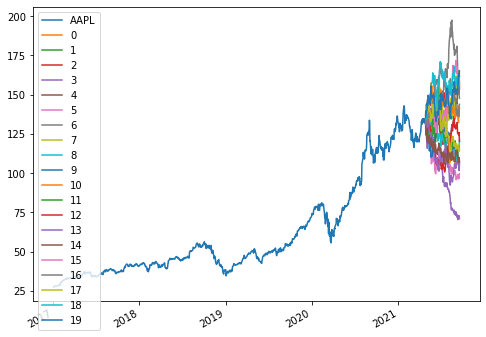

In [14]:
pd.concat([closes_aapl,sim_closes.iloc[:,:20]]).plot(figsize=(8,6));

Considerando que las opciones tienen como función de pago a:
$$ P(S(t),t)=max\{S(T)-K,0\} \rightarrow \text{En el caso de Call}$$ 
$$ P(S(t),t)=max\{K-S(T),0\} \rightarrow \text{En el caso de Put}$$ 
se llaman opciones **Vainilla**, con $h:[0,\infty) \to [0,\infty)$.

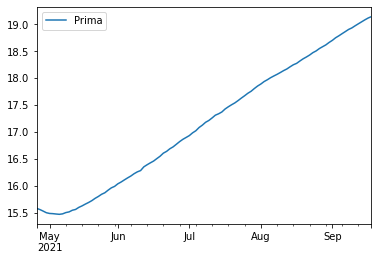

In [15]:
# Frame con el valor del strike
strike = pd.DataFrame(K*np.ones([ndays,nscen]), index=dates)

# Valor del put europeo
put = pd.DataFrame({'Prima':np.exp(-r*ndays) \
              *np.fmax(strike-sim_closes,np.zeros([ndays,nscen])).mean(axis=1)}, index=dates)
put.plot();

In [16]:
put.Prima[-1]

19.139630241556393

In [17]:
confianza = 0.99
sigma_est = sim_closes.iloc[-1].sem()
mean_est = put.iloc[-1].Prima
i2 = st.norm.interval(confianza, loc=mean_est, scale=sigma_est)
print(i2)

(18.910427437809314, 19.36883304530347)


In [18]:
opcion_valuar['JSON']

{'contractSymbol': 'AAPL210917P00150000',
 'strike': 150.0,
 'currency': 'USD',
 'lastPrice': 20.0,
 'change': 0.049999237,
 'percentChange': 0.25062272,
 'volume': 1,
 'openInterest': 1331,
 'bid': 19.8,
 'ask': 19.95,
 'contractSize': 'REGULAR',
 'expiration': 1631836800,
 'lastTradeDate': 1619451093,
 'impliedVolatility': 0.2915109912109374,
 'inTheMoney': True}

### Valuación con Modelo de Black Scholes

Si consideramos el valor resultante de nuestra simulación montecarlo y de lo comparamos con el precio de dicha opción entonces el valor no esta demasiado lejos del precio de mercado actualmente

Si consideramos la Ecuación de Black-Scholes
$$ dS(t) = \mu S(t) + \sigma S(t)dW_t$$
2. Solución de la ecuación

El valor de una opción Europea de vainilla $V_t$ puede obtenerse por:
$$V_t = F(t,S_t)$$ donde

$$F(t,S_t)=S_tN(d_1)-Ke^{r(T-t)}N(d_2)$$

$$N(x)=\frac{1}{\sqrt{2\pi}}\int_{-\infty}^{x} e^{-\frac{y^2}{2}} dy$$

$$d_1 = \frac{\ln{S_t/K)+(r+\frac{1}{2}\sigma^2)(T-t)}}{\sigma\sqrt{T-t}}$$
$$d_2 = \frac{\ln{S_t/K)+(r-\frac{1}{2}\sigma^2)(T-t)}}{\sigma\sqrt{T-t}}$$


In [19]:
def BlackScholes(St:'Precio al día de hoy',
                 K: 'Precio Strike',
                 T = 'tiempo',
                 sigma = 'volatilidad',
                 r = 'tasa r',
                 tipo = 'Put o Call'):
    """
    Función que calcula el valor de una opción de tipo europea call o put en base a su precio, strike y demás
    datos, devuelve la opción de tipo Put en caso de que el tipo sea igual a True y Call en el caso de que sea False
    """
    if tipo == True:
        a = -1
    else:
        a = 1
    d1 = lambda K,St,r,sigma,T: (np.log(St/K) + (r+0.5*sigma**2)*T)/(sigma*T**0.5)
    d2 = lambda K,St,r,sigma,T: (np.log(St/K) + (r-0.5*sigma**2)*T)/(sigma*T**0.5)
    P = a*St*st.norm(0,1).cdf(d1(K,St,r,sigma,T)*a)- a*K*np.exp(-r*T)*st.norm(0,1).cdf(d2(K,St,r,sigma,T)*a)
    return P

Si consideramos la volatilidad implicita que viene dentro de la opción nos queda el siguiente resultado

In [20]:
BlackScholes(S0,K,(expiry- today).days/360,opcion_valuar['JSON']['impliedVolatility'],0.0006,True)

19.986459451388683

Lo cuál es muy cercano al ultimo precio que fue de 20 y similar al ask pedido, podrá variar un poco el precio debido a los cambios constantes en el precio del subyacente conforme avanza el día